<a href="https://colab.research.google.com/github/jsebastianquiroga/DEEP_LEARNING_PUJ/blob/main/Traffic_sign/notebook/Taller_2_Caicedo_Garc%C3%ADa_Quiroga.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <img style="float: center; padding-right: 10px;" src="https://www.pikpng.com/pngl/b/467-4670553_universidad-javeriana-esslingen-am-neckar-clipart.png" width="100" height="150">



<h1> <strong>Aprendizaje Profundo.</strong></h1> 
<h2> Para: Ing. Julio Omar Palacio Niño, M.Sc.</br></h2>
<h2>Integrantes:</br></h2>
<h2>Antonio Jose Caicedo.</br></h2>
<h2>Juan Sebastián Quiroga Bernal. </h2>
<h2>Leonardo García.</br></h2>

**Este colab puede ser ejecutado por cualquier usuario sin necesidad de cargar los archivos al entorno, debido a que la conexión está configurada para acceder a los archivos desde la nube**.


<h1> <strong>Taller 2: Traffic Sign Classification and Recognition.</strong></h1> 

En este notebook exploraremos diferentes propuestas de redes convolucionales para el reconocimiento y clasificación de señales de tráfico. Para ello, utilizaremos el conjunto de datos "Traffic Sign Classification and Recognition", que contiene más de 6.000 imágenes etiquetadas manualmente en 10 categorías diferentes, que incluyen señales de guía, señales de velocidad máxima y señales de prioridad, entre otras.

El conjunto de datos se encuentra dividido en un conjunto de entrenamiento y un conjunto de prueba, cada uno con su respectivo archivo de anotaciones en formato JSON. En este notebook, implementaremos diferentes arquitecturas de redes convolucionales utilizando la biblioteca Keras, y evaluaremos su rendimiento en términos de precisión y pérdida.

El objetivo de este proyecto es explorar diferentes técnicas y arquitecturas de redes convolucionales para mejorar el reconocimiento y clasificación de señales de tráfico.

En el presente Notebook, se exploraran los datos del data set de Kaggel: https://www.kaggle.com/datasets/wjybuqi/traffic-sign-classification-and-recognition

Este conjunto de datos contiene 6358 etiquetas de categorías etiquetadas manualmente. Las etiquetas incluyen las 10 categorías siguientes: `GuideSign`, `M1`, `M4`, `M5`, `M6`, `M7`, `P1`, `P10_50`, `P12`, `W1`, correspondientes a diez categorías diferentes de señales de tráfico. Todos los datos se han dividido manualmente en conjunto de entrenamiento y conjunto de prueba según la proporción.

<table>
  <tr>
    <th>Categoría</th>
    <th>Descripción</th>
  </tr>
  <tr>
    <td>Guidesign</td>
    <td>Refiere al diseño y la colocación de señales de tráfico para guiar y orientar a los conductores y peatones en la vía pública.</td>
  </tr>
  <tr>
    <td>M1</td>
    <td>Señales de tráfico que indican la dirección a seguir, como flechas de dirección y señales de carril para la entrada y salida de carriles.</td>
  </tr>
  <tr>
    <td>M4</td>
    <td>Señales de tráfico que se colocan a lo largo de los carriles de tráfico para proporcionar información específica sobre los carriles de la carretera.</td>
  </tr>
  <tr>
    <td>M5</td>
    <td>Señales de tráfico que indican la presencia de una carretera o un camino, y las restricciones o regulaciones que se aplican a los vehículos en la misma.</td>
  </tr>
  <tr>
    <td>M6</td>
    <td>Señales de tráfico específicas para ciclistas que indican carriles o áreas exclusivas para bicicletas.</td>
  </tr>
  <tr>
    <td>M7</td>
    <td>Señales de tráfico que indican la presencia de un paso de peatones y que alertan a los conductores para reducir la velocidad y ceder el paso a los peatones.</td>
  </tr>
  <tr>
    <td>P1</td>
    <td>Señales de tráfico que indican una prohibición o restricción, como una señal de "prohibido estacionarse" o una señal de "prohibido girar a la izquierda".</td>
  </tr>
  <tr>
    <td>P10_50</td>
    <td>Señales de tráfico que indican los límites de velocidad máxima en una determinada carretera o calle.</td>
  </tr>
  <tr>
    <td>P12</td>
    <td>Señales de tráfico que indican una cortesía o sugerencia, como una señal de "cambio de carril sugerido" o una señal de "ceda el paso".</td>
  </tr>
  <tr>
    <td>W1</td>
    <td>Señales de tráfico que indican peligros o advertencias en la carretera, como señales de "curva peligrosa" o señales de "cruce de animales".</td>
  </tr>
</table>

El presente notebook, estará dividido en divido en las siguientes partes:
<ol>
<li> Cargue y preparación del data set  </li>
<li> Exploración del data set y su comprención. </li>
<li> Modelo 1: </li>
<li> Modelo 2.</li>
<li> Analisis de resultados redes.</li>
<li> Bono.</li>
</ol>

 <a id="carque"></a>
# 1. Cargue del data set.

In [59]:
from psutil import virtual_memory
ram_gb = virtual_memory().total / 1e9
print('Your runtime has {:.1f} gigabytes of available RAM\n'.format(ram_gb))

if ram_gb < 20:
  print('Not using a high-RAM runtime')
else:
  print('You are using a high-RAM runtime!')

Your runtime has 27.3 gigabytes of available RAM

You are using a high-RAM runtime!


In [60]:
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Not connected to a GPU')
else:
  print(gpu_info)

/bin/bash: nvidia-smi: command not found


In [61]:
# Importar las liobrerías y paquetes
import os
from scipy import signal
import matplotlib.pyplot as plt
import numpy as np
from skimage import color
from skimage import io
import pandas as pd

from matplotlib.image import imread
# Conexion a gdrive
from pydrive.auth import GoogleAuth
from google.colab import drive
from pydrive.drive import GoogleDrive
from google.colab import auth

from oauth2client.client import GoogleCredentials 
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

Las imágenes que se utilizarán en este proyecto ya han sido segmentadas previamente en la competencia de Kaggle. Para su uso en este proyecto, las imágenes han sido cargadas en un drive público. Se cargarán las bases de datos tal como fueron proporcionadas en la competencia.

In [62]:
folder = '18VNhiT-PPcYOsfpX1TN66ektcXl3BShn'
download = drive.CreateFile({'id': folder})
download.GetContentFile('traffic-sings.zip') # Guarda las imagenes en un archivo temporal

!unzip -qn traffic-sings.zip -d dataset | head -n 5


PATH = '/content/dataset'

print(os.listdir(PATH))

train_dir = os.path.join(PATH, 'train_dataset', 'train')
test_dir = os.path.join(PATH, 'test_dataset', 'test')

['submit_example.json', 'train_dataset', 'test_dataset']


El código descarga un archivo zip de un conjunto de datos sobre señales de tráfico desde Google Drive. Luego descomprime el archivo en una carpeta llamada "dataset". Se establece el directorio de entrenamiento y prueba para el modelo y se definen los parámetros para el preprocesamiento de imágenes utilizando ImageDataGenerator. En particular, las imágenes se escalan entre 0 y 1 y se establece el parámetro class_mode en "categorical" para admitir múltiples clases. Finalmente, se utiliza flow_from_directory para crear generadores de lotes de datos para entrenamiento y prueba.

In [63]:
from keras.preprocessing.image import ImageDataGenerator 

#valores  de entrada:

pixel= 224 #imagenes de 150 pixeles
size=20
epocas=25
batch = 200


train_val_generator = ImageDataGenerator(rescale=1./255, validation_split=0.05) #escalar entre 0-1 # se saca el 5% de train para validación
test_datagen = ImageDataGenerator(rescale = 1./255) #escalar entre 0-1

In [64]:
train_generator = train_val_generator.flow_from_directory(
    train_dir,            # Directorio que contiene las imágenes de entrenamiento
    target_size=(pixel, pixel), # Tamaño de la imagen después de reescalarla
    color_mode="rgb",        # Tipo de imagen: RGB o grayscale
    batch_size=batch,        # Número de imágenes por lote generado por el generador
    class_mode='categorical',# Categórico para múltiples clases, binario para dos clases
    subset='training'        #creación de validación o test
)

val_generator = train_val_generator.flow_from_directory(
    train_dir,            # Directorio que contiene las imágenes de entrenamiento
    target_size=(pixel, pixel), # Tamaño de la imagen después de reescalarla
    color_mode="rgb",        # Tipo de imagen: RGB o grayscale
    batch_size=batch,        # Número de imágenes por lote generado por el generador
    class_mode='categorical',# Categórico para múltiples clases, binario para dos clases
    subset='validation',   #creación de validación o test
    shuffle=False
)
test_generator = test_datagen.flow_from_directory(
    test_dir,             # Directorio que contiene las imágenes de test
    target_size=(pixel, pixel),    # Tamaño de la imagen después de reescalarla
    color_mode="rgb",       # Tipo de imagen: RGB o grayscale
    batch_size=batch,        # Número de imágenes por lote generado por el generador
    class_mode='categorical',   # Categórico para múltiples clases, binario para dos clases
    shuffle=False,           # Mezcla el orden de las imágenes producidas
    seed=42                 # Semilla aleatoria para reproducibilidad
)

Found 5728 images belonging to 10 classes.
Found 296 images belonging to 10 classes.
Found 324 images belonging to 10 classes.


Son un total de 6348 imagenes, donde se tendran solo 324 como test, y se crea un data set de validación adicional para poder analisar posibles sobre entrenamientos

<a id="carque"></a>
# 2. Exploración del data set y su comprención 

In [65]:
import os
import random
import numpy as np
import matplotlib.pyplot as plt

def get_random_image_from_each_label(root_dir, num_labels=10):
    """
    Obtener una imagen aleatoria de cada etiqueta (subdirectorio) en el directorio raíz.
    root_dir: Directorio raíz que contiene los subdirectorios con las imágenes.
    num_labels: Número de etiquetas a considerar.
    """

    # Obtener una lista de los nombres de los subdirectorios
    subdirs = os.listdir(root_dir)

    # Seleccionar aleatoriamente num_labels subdirectorios
    random_subdirs = random.sample(subdirs, num_labels)

    # Inicializar una lista para almacenar las rutas de las imágenes seleccionadas
    selected_images = []

    # Iterar sobre los subdirectorios seleccionados
    for subdir in random_subdirs:
        # Obtener una lista de las rutas de las imágenes en el subdirectorio actual
        image_paths = [os.path.join(root_dir, subdir, filename) for filename in os.listdir(os.path.join(root_dir, subdir))]
        # Seleccionar aleatoriamente una imagen
        selected_image_path = random.choice(image_paths)
        # Agregar la ruta de la imagen seleccionada a la lista de imágenes seleccionadas
        selected_images.append(selected_image_path)

    # Cargar las imágenes seleccionadas en una matriz numpy
    images = []
    for image_path in selected_images:
        image = plt.imread(image_path)
        images.append(image)
    images = np.array(images)

    return images

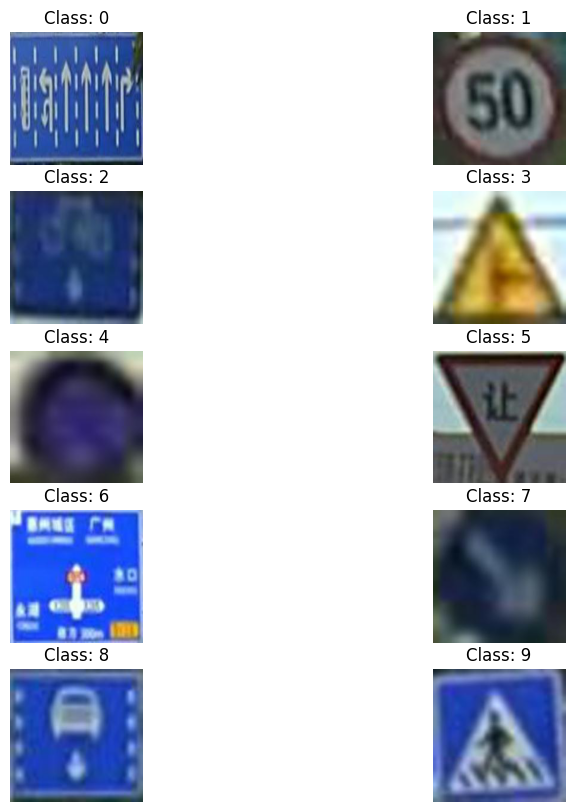

In [66]:
# Obtener un lote de imágenes aleatorias de cada etiqueta
random_images = get_random_image_from_each_label('dataset/train_dataset/train')

# Visualizar las imágenes con sus respectivas etiquetas
plt.figure(figsize=(10, 10))
for i in range(len(random_images)):
    plt.subplot(5, 2, i+1)
    plt.imshow(random_images[i])
    plt.title("Class: " + str(i))
    plt.axis('off')
plt.show()


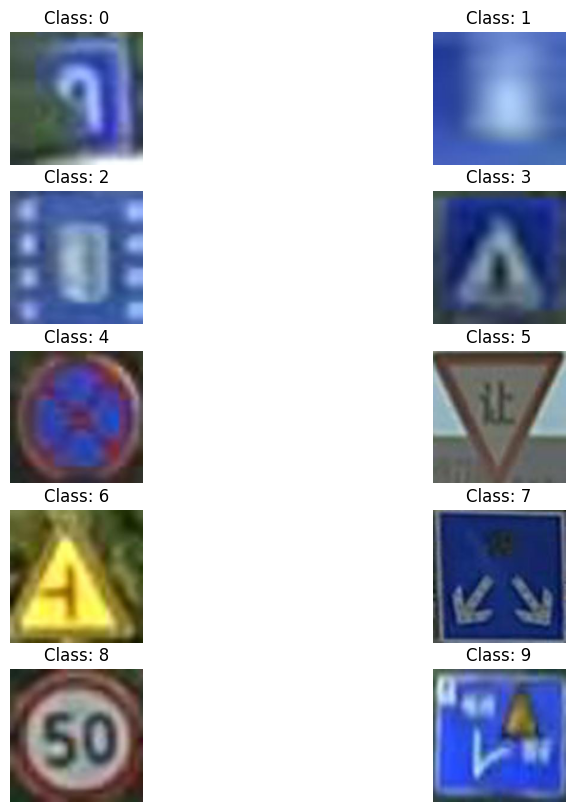

In [67]:
# Obtener un lote de imágenes aleatorias de cada etiqueta
random_images = get_random_image_from_each_label('dataset/test_dataset/test')

# Visualizar las imágenes con sus respectivas etiquetas
plt.figure(figsize=(10, 10))
for i in range(len(random_images)):
    plt.subplot(5, 2, i+1)
    plt.imshow(random_images[i])
    plt.title("Class: " + str(i))
    plt.axis('off')
plt.show()



El conjunto de entrenamiento consta de 6024 imágenes y el conjunto de prueba de 324 imágenes, cada una de tamaño 224 píxeles. Al analizar los conjuntos de datos, se observan diferencias en colores y formas, así como una resolución ligeramente inferior en algunas imágenes. El conjunto de datos se divide en un total de 10 categorías, cada una con su nombre correspondiente: GuideSign, M1, M4, M5, M6, M7, P1, P10_50, P12 y W1. Para facilitar el procesamiento, se han reemplazado los nombres de las categorías por números del 0 al 9, siguiendo el mismo orden.

In [68]:
from PIL import Image
import os
import matplotlib.pyplot as plt

# Directorio que contiene las imágenes
root_dir  = 'dataset/train_dataset/train'

# Inicializa variables para contabilizar información del dataset
num_images = 0
image_sizes = set()

# Itera sobre todos los subdirectorios en el directorio raíz
for subdir, dirs, files in os.walk(root_dir):
    for filename in files:
        # Verifica que el archivo sea una imagen
        if filename.endswith('.jpg') or filename.endswith('.png'):
            # Carga la imagen
            img_path = os.path.join(subdir, filename)
            img = Image.open(img_path)

            # Contabiliza el número de imágenes y sus tamaños
            num_images += 1
            image_sizes.add(img.size)

# Imprime información del dataset
print(f'Número total de imágenes: {num_images}')
print(f'Tamaños de imágenes: {image_sizes}')


Número total de imágenes: 6024
Tamaños de imágenes: {(224, 224)}


Text(0.5, 1.0, 'Participación acumulada por clase TRAIN')

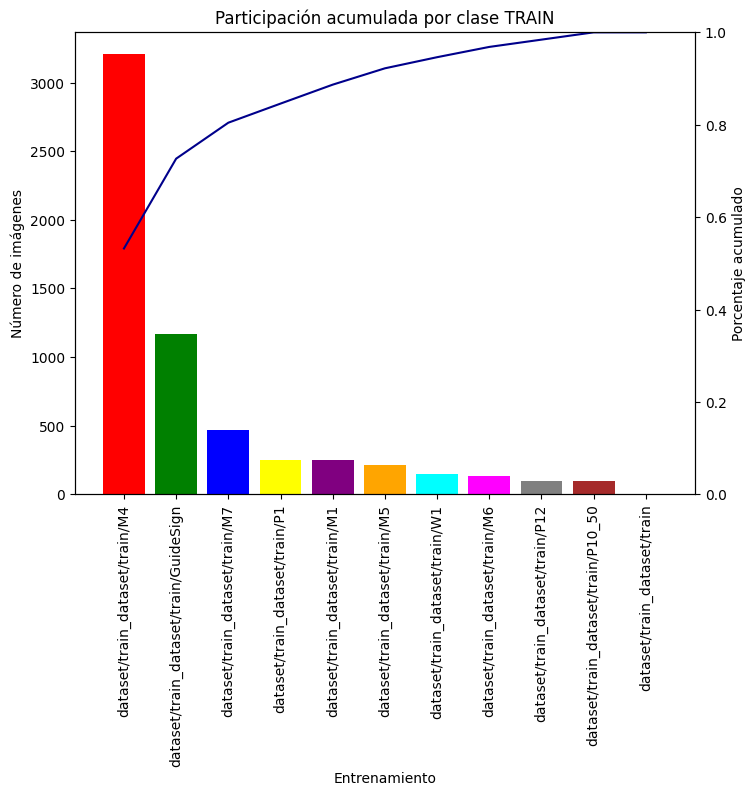

In [69]:
import matplotlib.pyplot as plt
import os

# Especifica la ruta del directorio raíz que contiene los subdirectorios con las imágenes
root_dir  = 'dataset/train_dataset/train'

# Inicializa un diccionario para contabilizar el número de imágenes por carpeta
num_images_per_folder = {}

# Itera sobre todos los subdirectorios en el directorio raíz
for subdir, dirs, files in os.walk(root_dir):
    # Inicializa un contador de imágenes para el subdirectorio actual
    num_images = 0

    # Itera sobre todos los archivos en el subdirectorio
    for filename in files:
        # Verifica que el archivo sea una imagen
        if filename.endswith('.jpg') or filename.endswith('.png'):
            # Incrementa el contador de imágenes
            num_images += 1

    # Agrega la cantidad de imágenes contabilizadas al diccionario
    num_images_per_folder[subdir] = num_images

# Ordena el diccionario por el número de imágenes de mayor a menor
sorted_folders = sorted(num_images_per_folder.items(), key=lambda x: x[1], reverse=True)

# Calcula los porcentajes y acumulados en una lista
percentages = []
cumulative_percentage = 0
for folder in sorted_folders:
    percentage = folder[1] / sum(num_images_per_folder.values())
    percentages.append(percentage)
    cumulative_percentage += percentage

# Crea un gráfico de barras que muestra el número de imágenes por carpeta
# Crea un gráfico de barras que muestra el número de imágenes por carpeta
fig, ax1 = plt.subplots()

ax1.bar(range(len(sorted_folders)), [folder[1] for folder in sorted_folders], align='center', color=['red', 'green', 'blue', 'yellow', 'purple', 'orange', 'cyan', 'magenta', 'gray', 'brown'])
ax1.set_xticks(range(len(sorted_folders)))
ax1.set_xticklabels([folder[0] for folder in sorted_folders], rotation=90)
ax1.set_xlabel('Entrenamiento')
ax1.set_ylabel('Número de imágenes')

# Agrega una línea con el porcentaje acumulado
ax2 = ax1.twinx()
ax2.plot(range(len(sorted_folders)), np.cumsum(percentages), color='darkblue')
ax2.set_ylabel('Porcentaje acumulado')
ax2.set_ylim([0, 1])

plt.title('Participación acumulada por clase TRAIN')


## 

La clase mayoritaria en entrenamiento es la clase M4 que cuenta con mas del 50%, las tres primeras clases encapsulan el 80% del total de observaciones.

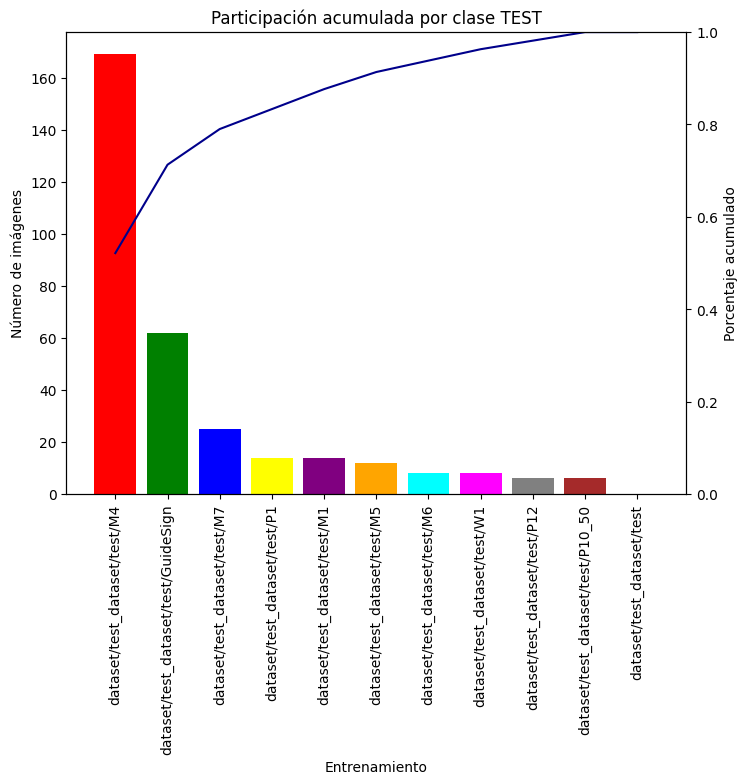

In [70]:
import matplotlib.pyplot as plt
import os

# Especifica la ruta del directorio raíz que contiene los subdirectorios con las imágenes
root_dir  = 'dataset/test_dataset/test'

# Inicializa un diccionario para contabilizar el número de imágenes por carpeta
num_images_per_folder = {}

# Itera sobre todos los subdirectorios en el directorio raíz
for subdir, dirs, files in os.walk(root_dir):
    # Inicializa un contador de imágenes para el subdirectorio actual
    num_images = 0

    # Itera sobre todos los archivos en el subdirectorio
    for filename in files:
        # Verifica que el archivo sea una imagen
        if filename.endswith('.jpg') or filename.endswith('.png'):
            # Incrementa el contador de imágenes
            num_images += 1

    # Agrega la cantidad de imágenes contabilizadas al diccionario
    num_images_per_folder[subdir] = num_images

# Ordena el diccionario por el número de imágenes de mayor a menor
sorted_folders = sorted(num_images_per_folder.items(), key=lambda x: x[1], reverse=True)

# Calcula los porcentajes y acumulados en una lista
percentages = []
cumulative_percentage = 0
for folder in sorted_folders:
    percentage = folder[1] / sum(num_images_per_folder.values())
    percentages.append(percentage)
    cumulative_percentage += percentage

# Crea un gráfico de barras que muestra el número de imágenes por carpeta
fig, ax1 = plt.subplots()
ax1.bar(range(len(sorted_folders)), [folder[1] for folder in sorted_folders], align='center', color=['red', 'green', 'blue', 'yellow', 'purple', 'orange', 'cyan', 'magenta', 'gray', 'brown'])
ax1.set_xticks(range(len(sorted_folders)))
ax1.set_xticklabels([folder[0] for folder in sorted_folders], rotation=90)
ax1.set_xlabel('Entrenamiento')
ax1.set_ylabel('Número de imágenes')

# Agrega una línea con el porcentaje acumulado
ax2 = ax1.twinx()
ax2.plot(range(len(sorted_folders)), np.cumsum(percentages), color='darkblue')
ax2.set_ylabel('Porcentaje acumulado')
ax2.set_ylim([0, 1])

plt.title('Participación acumulada por clase TEST')

plt.show()

Se mantiene la misma proporcion que el las imagenes de entrenameinto.

# 3. Modelo 1.

Este es un ejemplo de una arquitectura de red neuronal convolucional comúnmente utilizada en tareas de clasificación de imágenes. La arquitectura incluye varias capas diferentes, cada una con una función específica:

Una capa convolucional con 32 detectores de características, tamaño de kernel de 5x5, función de activación ReLU y panding. Esta capa se encarga de extraer características importantes de la imagen de entrada mediante la convolución con los detectores de características.
Una capa de max pooling de tamaño 5x5. Esta capa reduce la resolución espacial de las características extraídas por la capa convolucional, lo que reduce la cantidad de parámetros y la cantidad de cálculos necesarios en las capas siguientes.
Una capa de flattening. Esta capa convierte las características bidimensionales en un vector unidimensional, lo que permite que la información fluya desde la capa convolucional y de pooling hacia las capas completamente conectadas.
Una capa completamente conectada con 100 neuronas y función de activación ReLU. Esta capa procesa el vector de características unidimensional generado por la capa de flattening para producir características más abstractas y significativas para la tarea de clasificación.
Una capa de salida con el mismo número de clases a clasificar y función de activación softmax. Esta capa produce una distribución de probabilidad sobre las diferentes clases, lo que permite que la red determine la clase más probable para la imagen de entrada.

In [71]:
import tensorflow as tf

model_1 = tf.keras.models.Sequential()

# Añadimos la primera capa
model_1.add(tf.keras.layers.Conv2D(32,(5,5), strides=(1,1), activation = 'relu', padding='same',input_shape = (pixel, pixel, 3)))
model_1.add(tf.keras.layers.MaxPooling2D(pool_size = (5,5)))

# Hacemos un flatten para poder usar una red fully connected con 100 neuronas
model_1.add(tf.keras.layers.Flatten())
model_1.add(tf.keras.layers.Dense(100, activation='relu'))

# Añadimos una capa softmax para que podamos clasificar las imágenes
model_1.add(tf.keras.layers.Dense(units= 10, activation='softmax'))

model_1.compile(optimizer="rmsprop",
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model_1.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 224, 224, 32)      2432      
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 44, 44, 32)       0         
 2D)                                                             
                                                                 
 flatten_6 (Flatten)         (None, 61952)             0         
                                                                 
 dense_12 (Dense)            (None, 100)               6195300   
                                                                 
 dense_13 (Dense)            (None, 10)                1010      
                                                                 
Total params: 6,198,742
Trainable params: 6,198,742
Non-trainable params: 0
____________________________________________

Con el animo de que la experiencia sea rapida en pro del entrenamiento, se comentara el siguiente bloque de codigo, donde se entrena el modelo, ya esta guardado dentro del repositorio.

In [72]:
# # Compile the model
# model_1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# # Train the model
# Entrenamiento1 = model_1.fit(
#               train_generator,
#               epochs = epocas, 
#               validation_data=(val_generator),
#               steps_per_epoch = train_generator.n // batch
#           )

# file_list = drive.ListFile({'q':"'1DsobrlIFWI7g4W5Mwd8E6m9HsW_4xmEd' in parents and trashed=false"}).GetList()
# for file in file_list:
#     if file['title'] == 'keras_model.h5':
#         file.Delete()
#     if file['title'] == 'Entrenamiento1.csv':
#         file.Delete()

# model_1.save('keras_model.h5')

# # Upload the model file to Google Drive
# zip_file = drive.CreateFile({'parents': [{'id': '1DsobrlIFWI7g4W5Mwd8E6m9HsW_4xmEd'}]})
# zip_file.SetContentFile('keras_model.h5')
# zip_file.Upload({'convert': True})

# # Export Entrenamiento1 as a CSV file
# import pandas as pd
# df = pd.DataFrame.from_dict(Entrenamiento1.history)
# csv_file = 'Entrenamiento1.csv'
# df.to_csv(csv_file, index=False)

# # Create the file object and set the parents to the destination folder
# csv_drive_file = drive.CreateFile({'title': csv_file, 'parents': [{'id': '1DsobrlIFWI7g4W5Mwd8E6m9HsW_4xmEd'}]})

# # Set the content of the file and upload it to Drive
# csv_drive_file.SetContentFile(csv_file)
# csv_drive_file.Upload()


Este código se encarga de el modelo guardado como .h5 desde Google Drive y descomprimirlo en una carpeta de Colab, y luego cargar el modelo Keras desde la carpeta descomprimida.


In [73]:
folder_id = '1DsobrlIFWI7g4W5Mwd8E6m9HsW_4xmEd'  # ID of the folder
file_list = drive.ListFile({'q': f"'{folder_id}' in parents and trashed=false"}).GetList()
file_name = 'keras_model.h5'
file_id = None
for file in file_list:
    if file['title'] == file_name:
        file_id = file['id']
        break
download_file = drive.CreateFile({'id': file_id})
download_file.GetContentFile(file_name)

from tensorflow.keras.models import load_model
loaded_model = load_model(file_name)

entrenamiento_file_name = 'Entrenamiento1.csv'
entrenamiento_file_id = None
for file in file_list:
    if file['title'] == entrenamiento_file_name:
        entrenamiento_file_id = file['id']
        break
entrenamiento_file = drive.CreateFile({'id': entrenamiento_file_id})
entrenamiento_file.GetContentFile(entrenamiento_file_name)
entrenamiento_df = pd.read_csv(entrenamiento_file_name)

loaded_model.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 224, 224, 32)      2432      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 44, 44, 32)       0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 61952)             0         
                                                                 
 dense_4 (Dense)             (None, 100)               6195300   
                                                                 
 dense_5 (Dense)             (None, 10)                1010      
                                                                 
Total params: 6,198,742
Trainable params: 6,198,742
Non-trainable params: 0
____________________________________________

Se valida que cumpla con la misma arquitectura construida

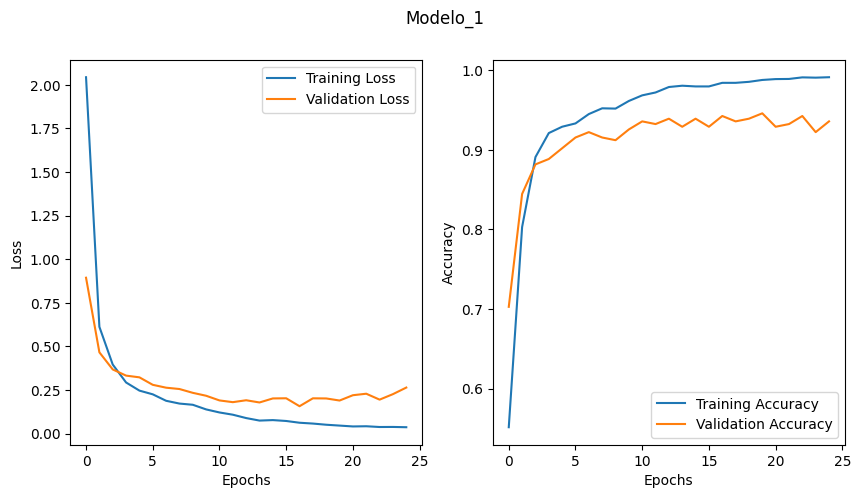

In [74]:
import matplotlib.pyplot as plt

# Obtener los datos de entrenamiento
train_loss = entrenamiento_df.loc[:, 'loss']
val_loss = entrenamiento_df.loc[:, 'val_loss']
train_acc = entrenamiento_df.loc[:, 'accuracy']
val_acc = entrenamiento_df.loc[:, 'val_accuracy']

# Crear la figura
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
fig.suptitle('Modelo_1')

# Graficar la curva de pérdida de entrenamiento y validación
axs[0].plot(train_loss, label='Training Loss')
axs[0].plot(val_loss, label='Validation Loss')
axs[0].set_xlabel('Epochs')
axs[0].set_ylabel('Loss')
axs[0].legend()

# Graficar la curva de exactitud de entrenamiento y validación
axs[1].plot(train_acc, label='Training Accuracy')
axs[1].plot(val_acc, label='Validation Accuracy')
axs[1].set_xlabel('Epochs')
axs[1].set_ylabel('Accuracy')
axs[1].legend()

plt.show()


In [75]:
test_loss, test_acc = loaded_model.evaluate(test_generator) 
val_loss, val_acc = loaded_model.evaluate_generator(val_generator, steps=train_generator.n // batch)
print('_____________________________________')
print(f'Validation loss: {val_loss:.4f}')
print(f'Validation accuracy: {val_acc:.4f}')
print('_____________________________________')
print(f'Test loss: {test_loss:.4f}') 
print(f'Test accuracy: {test_acc:.4f}')
print('_____________________________________')


prediccion_1 = loaded_model.predict(test_generator)
y_pred_df_1 = pd.DataFrame(prediccion_1)
y_pred_df_1 = np.argmax(y_pred_df_1.values, axis=1)
true_classes_1 = test_generator.classes
class_labels = list(test_generator.class_indices.keys())   
from sklearn.metrics import classification_report
report = classification_report(y_pred_df_1, true_classes_1, target_names=class_labels)

print(report)

2/2 [==============================] - 2s 740ms/step - loss: 0.2532 - accuracy: 0.9537


<ipython-input-75-e0f5f58ac9d1>:2: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  val_loss, val_acc = loaded_model.evaluate_generator(val_generator, steps=train_generator.n // batch)


_____________________________________
Validation loss: 0.2638
Validation accuracy: 0.9358
_____________________________________
Test loss: 0.2532
Test accuracy: 0.9537
_____________________________________


2/2 [==============================] - 2s 729ms/step
              precision    recall  f1-score   support

   GuideSign       0.98      0.95      0.97        64
          M1       0.86      0.75      0.80        16
          M4       0.97      0.97      0.97       169
          M5       0.92      0.92      0.92        12
          M6       0.50      1.00      0.67         4
          M7       0.96      0.92      0.94        26
          P1       0.93      1.00      0.96        13
      P10_50       1.00      1.00      1.00         6
         P12       1.00      1.00      1.00         6
          W1       1.00      1.00      1.00         8

    accuracy                           0.95       324
   macro avg       0.91      0.95      0.92       324
weighted avg       0.96      0.95      0.96       324



Podemos observar que tanto la función de pérdida como la precisión mejoran a medida que se avanza en el entrenamiento, lo que indica que el modelo está aprendiendo a partir de los datos. Sin embargo, en algunos casos, podemos observar que la precisión en los datos de validación disminuye, lo que sugiere que el modelo podría estar sobreajustando los datos de entrenamiento. En general, se puede concluir que el entrenamiento de una red neuronal es un proceso iterativo que requiere ajustar diferentes parámetros hasta encontrar un equilibrio entre la precisión y la generalización del modelo, la clase que mejor predice es la M4 y GuideSing, las que se presentan en mayor proporcion en el conjunto de entrenamiento y test

Referente a esta primera propuesta, se recomienda:

1) Aumentar la cantidad de datos de entrenamiento puede ayudar a mejorar el desempeño de la red neuronal convolucional. Se sugiere recolectar más imágenes de los diferentes tipos de señales de tráfico que se quieren clasificar y utilizar técnicas de aumento de datos, como rotaciones, traslaciones y zoom, para generar más variabilidad en el conjunto de entrenamiento. Además, se podría considerar utilizar técnicas de transferencia de aprendizaje, donde se reutilizan pesos previamente entrenados en una red neuronal pre-entrenada para acelerar y mejorar el proceso de entrenamiento de la red.

2) La incorporación de capas de regularización, como la capa Dropout, podría ayudar a reducir el sobreajuste de la red. Se sugiere agregar capas Dropout después de las capas densas con una tasa de abandono (dropout rate) de al menos el 30%. También se podría explorar la utilización de otras técnicas de regularización, como L1 y L2, para penalizar la complejidad de la red y reducir el sobreajuste.

3) Otra posible estrategia para mejorar el desempeño de la red es modificar la arquitectura de la misma. Se sugiere agregar más capas convolucionales y/o de pooling para aumentar la profundidad de la red. También se podría explorar la utilización de diferentes funciones de activación y optimizadores para encontrar la combinación más efectiva. Además, se podría considerar la utilización de arquitecturas de redes neuronales pre-entrenadas, como VGG, Inception o ResNet, que han demostrado un excelente desempeño en tareas de clasificación de imágenes.

4) Balancear las clases desbalanceadas, 

# 4. Modelo 2.

<html>
  <p>Se va a realizar una red neuronal convolucional con las siguientes características para la construcción del clasificador en un segundo parámetro de configuración:</p>
  <ul>
    <li>Capa convolucional con 48 detectores de características, tamaño de kernel de 3x3, función de activación lineal rectificada (ReLU) de paso 1 y con panding.</li>
    <li>Capa de max pooling de tamaño 2x2.</li>
    <li>Capa convolucional con 96 detectores de características, tamaño de kernel de 3x3, función de activación lineal rectificada (ReLU) de paso 1 y con panding.</li>
    <li>Capa de max pooling de tamaño 2x2.</li>
    <li>Capa de Flattening.</li>
    <li>Capa full conectada con 100 neuronas y función de activación lineal rectificada (ReLU).</li>
    <li>Capa full conectada con 100 neuronas y función de activación lineal rectificada (ReLU).</li>
    <li>Capa de salida del mismo número de las clases a clasificar y función de activación softmax.</li>
  </ul>
  <p>La red convolucional descrita tiene una arquitectura típica para la clasificación de imágenes, en la que se utilizan capas convolucionales para detectar características y capas de max pooling para reducir la dimensionalidad de la imagen. Luego se utilizan capas totalmente conectadas para realizar la clasificación final. Con esta arquitectura, se espera obtener buenos resultados en la clasificación de imágenes con un conjunto de datos apropiado y un entrenamiento adecuado.</p>
</html>

In [76]:
model_2 = tf.keras.models.Sequential()

# Añadimos la primera capa
model_2.add(tf.keras.layers.Conv2D(48,(3,3), strides=(1,1), activation = 'relu', padding='same',input_shape = (224,224,3)))
model_2.add(tf.keras.layers.MaxPooling2D(pool_size = (2,2)))

# Añadimos la segunda capa
model_2.add(tf.keras.layers.Conv2D(96,(3,3), strides=(1,1), activation = 'relu', padding='same',input_shape = (224,224,3)))
model_2.add(tf.keras.layers.MaxPooling2D(pool_size = (2,2)))

# Hacemos un flatten para poder usar una red fully connected con 100 neuronas
model_2.add(tf.keras.layers.Flatten())
model_2.add(tf.keras.layers.Dense(100, activation='relu'))

# Añadimos una capa softmax para que podamos clasificar las imágenes
model_2.add(tf.keras.layers.Dense(units= 10, activation='softmax'))

model_2.compile(optimizer="rmsprop",
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model_2.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 224, 224, 48)      1344      
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 112, 112, 48)     0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 112, 112, 96)      41568     
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 56, 56, 96)       0         
 2D)                                                             
                                                                 
 flatten_7 (Flatten)         (None, 301056)            0         
                                                                 
 dense_14 (Dense)            (None, 100)              

In [77]:
# Train the model
# entrenamiento2 = model_2.fit(
#     train_generator,
#     epochs=epocas,
#     validation_data=(val_generator),
#     steps_per_epoch = train_generator.n // batch
# )

# file_list = drive.ListFile({'q':"'1DsobrlIFWI7g4W5Mwd8E6m9HsW_4xmEd' in parents and trashed=false"}).GetList()
# for file in file_list:
#     if file['title'] == 'keras_model_2.h5':
#         file.Delete()
#     if file['title'] == 'Entrenamiento2.csv':
#         file.Delete()

# model_2.save('keras_model_2.h5')

## # Upload the model file to Google Drive
## subir = drive.CreateFile({'parents': [{'id': '1DsobrlIFWI7g4W5Mwd8E6m9HsW_4xmEd'}]})
## subir.SetContentFile('keras_model_2.h5')
## subir.Upload({'convert': True})
## *lineas dejarlas comentadas, proceso manual por tamaño del modelo.

# # Export Entrenamiento1 as a CSV file
# import pandas as pd
# df_2 = pd.DataFrame.from_dict(entrenamiento2.history)
# csv_file_2 = 'Entrenamiento2.csv'
# df_2.to_csv(csv_file_2, index=False)

# # Create the file object and set the parents to the destination folder
# csv_drive_file_2 = drive.CreateFile({'title': csv_file_2, 'parents': [{'id': '1DsobrlIFWI7g4W5Mwd8E6m9HsW_4xmEd'}]})

# # Set the content of the file and upload it to Drive
# csv_drive_file_2.SetContentFile(csv_file_2)
# csv_drive_file_2.Upload()

In [78]:
folder_id = '1DsobrlIFWI7g4W5Mwd8E6m9HsW_4xmEd'  # ID of the folder
file_list = drive.ListFile({'q': f"'{folder_id}' in parents and trashed=false"}).GetList()
file_name_2 = 'keras_model_2.h5'
file_id_2 = None
for file in file_list:
    if file['title'] == file_name_2:
        file_id_2 = file['id']
        break
download_file_2 = drive.CreateFile({'id': file_id_2})
download_file_2.GetContentFile(file_name_2)

from tensorflow.keras.models import load_model
loaded_model_2 = load_model(file_name_2)

entrenamiento_file_name_2 = 'Entrenamiento2.csv'
entrenamiento_file_id_2 = None
for file in file_list:
    if file['title'] == entrenamiento_file_name_2:
        entrenamiento_file_id_2 = file['id']
        break
entrenamiento_file = drive.CreateFile({'id': entrenamiento_file_id_2})
entrenamiento_file.GetContentFile(entrenamiento_file_name_2)
entrenamiento_df_2 = pd.read_csv(entrenamiento_file_name_2)

loaded_model_2.summary()


Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 224, 224, 48)      1344      
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 112, 112, 48)     0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 112, 112, 96)      41568     
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 56, 56, 96)       0         
 2D)                                                             
                                                                 
 flatten_5 (Flatten)         (None, 301056)            0         
                                                                 
 dense_10 (Dense)            (None, 100)              

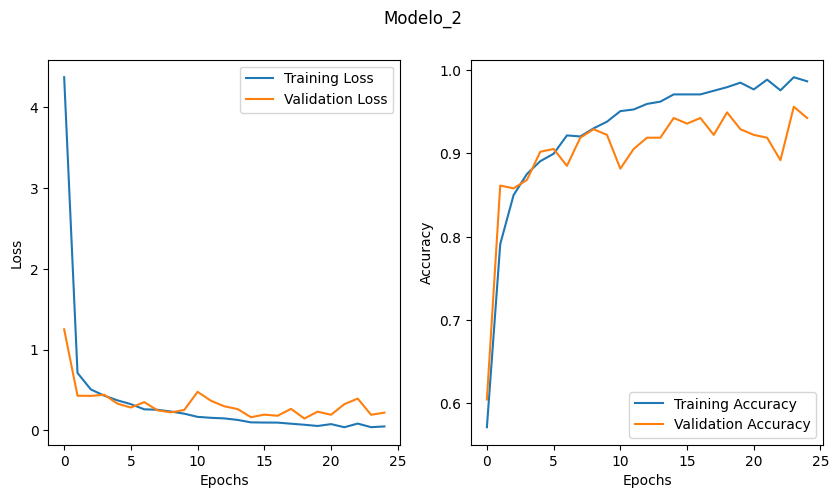

In [79]:
import matplotlib.pyplot as plt

# Obtener los datos de entrenamiento
train_loss_2 = entrenamiento_df_2.loc[:, 'loss']
val_loss_2 = entrenamiento_df_2.loc[:, 'val_loss']
train_acc_2 = entrenamiento_df_2.loc[:, 'accuracy']
val_acc_2 = entrenamiento_df_2.loc[:, 'val_accuracy']

# Crear la figura
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
fig.suptitle('Modelo_2')

# Graficar la curva de pérdida de entrenamiento y validación
axs[0].plot(train_loss_2, label='Training Loss')
axs[0].plot(val_loss_2, label='Validation Loss')
axs[0].set_xlabel('Epochs')
axs[0].set_ylabel('Loss')
axs[0].legend()

# Graficar la curva de exactitud de entrenamiento y validación
axs[1].plot(train_acc_2, label='Training Accuracy')
axs[1].plot(val_acc_2, label='Validation Accuracy')
axs[1].set_xlabel('Epochs')
axs[1].set_ylabel('Accuracy')
axs[1].legend()

plt.show()


In [80]:
test_loss_2, test_acc_2 = loaded_model_2.evaluate(test_generator) 
val_loss_2, val_acc_2 = loaded_model_2.evaluate_generator(val_generator, steps=train_generator.n // batch)
print('_____________________________________')
print(f'Validation loss: {val_loss_2:.4f}')
print(f'Validation accuracy: {val_acc_2:.4f}')
print('_____________________________________')
print(f'Test loss: {test_loss_2:.4f}') 
print(f'Test accuracy: {test_acc_2:.4f}')
print('_____________________________________')


prediccion_2 = loaded_model_2.predict(test_generator)
y_pred_df_2 = pd.DataFrame(prediccion_2)
y_pred_df_2 = np.argmax(y_pred_df_2.values, axis=1)

from sklearn.metrics import classification_report
report = classification_report(y_pred_df_2, true_classes_1, target_names=class_labels)

print(report)

2/2 [==============================] - 5s 2s/step - loss: 0.3541 - accuracy: 0.9475


<ipython-input-80-e1dea19f3eec>:2: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  val_loss_2, val_acc_2 = loaded_model_2.evaluate_generator(val_generator, steps=train_generator.n // batch)


_____________________________________
Validation loss: 0.2564
Validation accuracy: 0.9392
_____________________________________
Test loss: 0.3541
Test accuracy: 0.9475
_____________________________________
2/2 [==============================] - 5s 2s/step
              precision    recall  f1-score   support

   GuideSign       0.94      0.97      0.95        60
          M1       0.71      0.77      0.74        13
          M4       0.98      0.95      0.97       174
          M5       0.92      0.92      0.92        12
          M6       0.62      0.83      0.71         6
          M7       0.96      0.96      0.96        25
          P1       0.93      1.00      0.96        13
      P10_50       1.00      1.00      1.00         6
         P12       1.00      1.00      1.00         6
          W1       1.00      0.89      0.94         9

    accuracy                           0.95       324
   macro avg       0.91      0.93      0.92       324
weighted avg       0.95      0.95      0


Existen diversas técnicas que pueden ser utilizadas para mejorar el rendimiento y la generalización de un modelo de clasificación mediante redes neuronales. Una de ellas es ajustar el tamaño del lote de entrenamiento, ya que un tamaño menor puede permitir una mejor generalización al actualizar los pesos con mayor frecuencia. Otra técnica es incluir ajustes de regularización de L2 para reducir la sensibilidad de las variaciones del conjunto de entrenamiento, penalizando la suma de los cuadrados de cada peso individual. La normalización por lotes también puede ser utilizada para reducir la varianza de los valores de entrada a cada capa y mejorar la generalización del modelo. Además, la técnica de data augmentation puede ser utilizada para aumentar el conjunto de datos de entrenamiento mediante rotaciones, reflejos, cambio del brillo, contraste entre otros. Para reducir el sobreajuste, la eliminación aleatoria o dropout con una proporción del 50% podría ser útil, combinada con un aumento del número de neuronas para mejorar la generalización del modelo. Finalmente, las técnicas de transferencia de aprendizaje pueden ser consideradas, utilizando una red neuronal pre-entrenada como punto de partida para el problema de clasificación, lo que podría mejorar significativamente la capacidad de la red neuronal para aprender patrones en nuevos datos.

# 5. Propuesta: VGG16


La arquitectura de la red neuronal convolucional VGG16 es un modelo de aprendizaje profundo muy utilizado para la clasificación de imágenes. Esta red utiliza capas de convolución de tamaño reducido, seguidas de capas de pooling, y varias capas totalmente conectadas al final.

La arquitectura de la red VGG16 consta de varias capas convolucionales y capas totalmente conectadas, con un total de 16 capas, de ahí su nombre. La primera capa convolucional utiliza un kernel de tamaño 3x3, mientras que las capas subsiguientes utilizan un kernel de tamaño 2x2.

La red VGG16 es conocida por su alta precisión en la clasificación de imágenes, y se utiliza a menudo como una red pre-entrenada para tareas de clasificación de imágenes en conjuntos de datos grandes, como ImageNet.

Para implementar una red VGG16 en Keras, se puede utilizar la clase "VGG16" proporcionada por la biblioteca Keras. Esta clase se importa desde el módulo "keras.applications", y puede ser instanciada con o sin pesos pre-entrenados.

En este caso, al tratarse de una red RGB-VGG16, se utilizará la misma arquitectura, pero con imágenes a color (RGB) en lugar de imágenes en escala de grises.

Se realiza Transfer Learning manteniendo, la misma arquitectura de la capas densas que las anteriores.

In [81]:
from tensorflow.keras.applications import VGG16
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers import Dropout

modelo_3 = tf.keras.models.Sequential()

Capa4_Pre=VGG16(input_shape = (pixel, pixel, 3),
                 include_top=False,
                weights='imagenet')

#tera sobre las capas de la red VGG16 pre-entrenada y las establece como no entrenables. Esto significa que los pesos de esas capas no se actualizarán durante el entrenamiento de nuestro modelo
for layer in Capa4_Pre.layers:
    layer.trainable=True

capa4_51=Flatten()
capa4_61=Dense(100, use_bias=1, activation = "relu")
capa4_62=Dense(units= 10, activation='softmax')

modelo_3.add(Capa4_Pre)
modelo_3.add(capa4_51)
modelo_3.add(capa4_61)
modelo_3.add(capa4_62)

modelo_3.compile(optimizer="rmsprop",
                 loss='binary_crossentropy',
                 metrics=['accuracy'])

modelo_3.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 flatten_8 (Flatten)         (None, 25088)             0         
                                                                 
 dense_16 (Dense)            (None, 100)               2508900   
                                                                 
 dense_17 (Dense)            (None, 10)                1010      
                                                                 
Total params: 17,224,598
Trainable params: 17,224,598
Non-trainable params: 0
_________________________________________________________________


In [82]:
# entrenamiento_3=modelo_3.fit(train_generator, #conjunto de entrenamiento
#                epochs=epocas, #Cuantas epocas usaremos para entrenar
#                steps_per_epoch=train_generator.n // batch, 
#                validation_data=(val_generator),
#               ) 

# file_list = drive.ListFile({'q':"'1DsobrlIFWI7g4W5Mwd8E6m9HsW_4xmEd' in parents and trashed=false"}).GetList()
# for file in file_list:
#     if file['title'] == 'VGG16.h5':
#         file.Delete()
#     if file['title'] == 'Entrenamiento3.csv':
#         file.Delete()

# modelo_3.save('VGG16.h5')

# ## # Upload the model file to Google Drive
# ## subir = drive.CreateFile({'parents': [{'id': '1DsobrlIFWI7g4W5Mwd8E6m9HsW_4xmEd'}]})
# ## subir.SetContentFile('VGG16.h5')
# ## subir.Upload({'convert': True})
# # *lineas dejarlas comentadas, proceso manual por tamaño del modelo. 

# # Export Entrenamiento1 as a CSV file
# import pandas as pd
# df_3 = pd.DataFrame.from_dict(entrenamiento_3.history)
# csv_file_3 = 'Entrenamiento3.csv'
# df_3.to_csv(csv_file_3, index=False)

# # Create the file object and set the parents to the destination folder
# csv_drive_file_3 = drive.CreateFile({'title': csv_file_3, 'parents': [{'id': '1DsobrlIFWI7g4W5Mwd8E6m9HsW_4xmEd'}]})

# # Set the content of the file and upload it to Drive
# csv_drive_file_3.SetContentFile(csv_file_3)
# csv_drive_file_3.Upload()


In [83]:
folder_id = '1DsobrlIFWI7g4W5Mwd8E6m9HsW_4xmEd'  # ID of the folder
file_list = drive.ListFile({'q': f"'{folder_id}' in parents and trashed=false"}).GetList()
file_name_3 = 'VGG16.h5'
file_id_3 = None
for file in file_list:
    if file['title'] == file_name_3:
        file_id_3 = file['id']
        break
download_file_3 = drive.CreateFile({'id': file_id_3})
download_file_3.GetContentFile(file_name_3)

from tensorflow.keras.models import load_model
loaded_model_3 = load_model(file_name_3)

entrenamiento_file_name_3 = 'Entrenamiento3.csv'
entrenamiento_file_id_3 = None
for file in file_list:
    if file['title'] == entrenamiento_file_name_3:
        entrenamiento_file_id_3 = file['id']
        break
entrenamiento_file = drive.CreateFile({'id': entrenamiento_file_id_3})
entrenamiento_file.GetContentFile(entrenamiento_file_name_3)
entrenamiento_df_3 = pd.read_csv(entrenamiento_file_name_3)

loaded_model_3.summary()

Model: "sequential_20"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 flatten_18 (Flatten)        (None, 25088)             0         
                                                                 
 dense_36 (Dense)            (None, 100)               2508900   
                                                                 
 dense_37 (Dense)            (None, 10)                1010      
                                                                 
Total params: 17,224,598
Trainable params: 2,509,910
Non-trainable params: 14,714,688
_________________________________________________________________


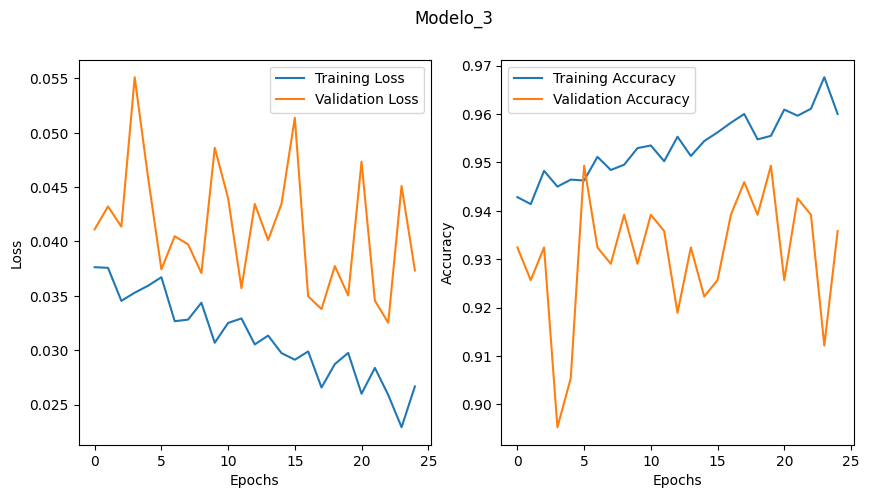

In [84]:
import matplotlib.pyplot as plt

# Obtener los datos de entrenamiento
train_loss_3 = entrenamiento_df_3.loc[:, 'loss']
val_loss_3 = entrenamiento_df_3.loc[:, 'val_loss']
train_acc_3 = entrenamiento_df_3.loc[:, 'accuracy']
val_acc_3 = entrenamiento_df_3.loc[:, 'val_accuracy']

# Crear la figura
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
fig.suptitle('Modelo_3')

# Graficar la curva de pérdida de entrenamiento y validación
axs[0].plot(train_loss_3, label='Training Loss')
axs[0].plot(val_loss_3, label='Validation Loss')
axs[0].set_xlabel('Epochs')
axs[0].set_ylabel('Loss')
axs[0].legend()

# Graficar la curva de exactitud de entrenamiento y validación
axs[1].plot(train_acc_3, label='Training Accuracy')
axs[1].plot(val_acc_3, label='Validation Accuracy')
axs[1].set_xlabel('Epochs')
axs[1].set_ylabel('Accuracy')
axs[1].legend()

plt.show()


In [85]:
test_loss_3, test_acc_3 = loaded_model_3.evaluate(test_generator)
val_loss_3, val_acc_3 = loaded_model_3.evaluate(val_generator, steps=train_generator.n // batch)
print('_____________________________________')
print(f'Validation loss: {val_loss_3:.4f}')
print(f'Validation accuracy: {val_acc_3:.4f}')
print('_____________________________________')
print(f'Test loss: {test_loss_3:.4f}') 
print(f'Test accuracy: {test_acc_3:.4f}')
print('_____________________________________')

prediccion_3 = loaded_model_3.predict(test_generator)
y_pred_df_3 = pd.DataFrame(prediccion_3)
y_pred_df_3 = np.argmax(y_pred_df_3.values, axis=1)

from sklearn.metrics import classification_report
report_3 = classification_report(y_pred_df_3, true_classes_1, target_names=class_labels)

print(report_3)


 2/28 [=>............................] - ETA: 8:25 - loss: 0.0373 - accuracy: 0.9358 

28/28 [==============================] - 60s 721ms/step - loss: 0.0373 - accuracy: 0.9358
_____________________________________
Validation loss: 0.0373
Validation accuracy: 0.9358
_____________________________________
Test loss: 0.0361
Test accuracy: 0.9537
_____________________________________
2/2 [==============================] - 65s 25s/step
              precision    recall  f1-score   support

   GuideSign       0.97      1.00      0.98        60
          M1       0.71      0.77      0.74        13
          M4       1.00      0.94      0.97       179
          M5       0.83      0.91      0.87        11
          M6       0.38      1.00      0.55         3
          M7       0.92      0.96      0.94        24
          P1       1.00      1.00      1.00        14
      P10_50       1.00      1.00      1.00         6
         P12       1.00      1.00      1.00         6
          W1       1.00      1.00      1.00         8

    accuracy                           0.95       324
  

Plotting Modelo_1 with keys accuracy and val_accuracy
Plotting Modelo_2 with keys accuracy and val_accuracy
Plotting Modelo_3 with keys accuracy and val_accuracy


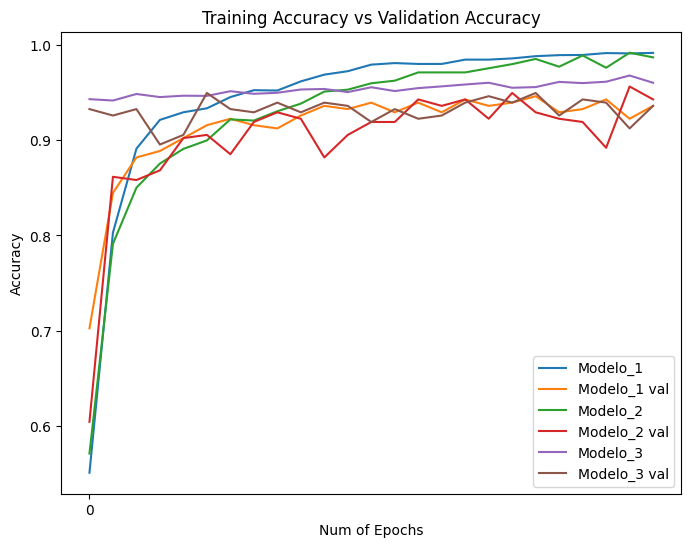

In [86]:
histories = {"Modelo_1": entrenamiento_df, "Modelo_2": entrenamiento_df_2, "Modelo_3": entrenamiento_df_3}

plt.figure(0)
for name, history in histories.items():
    acc_key = 'acc' if 'acc' in history.columns else 'accuracy'
    val_acc_key = 'val_acc' if 'val_acc' in history.columns else 'val_accuracy'
    print(f"Plotting {name} with keys {acc_key} and {val_acc_key}")
    plt.plot(history[acc_key], label=name)
    plt.plot(history[val_acc_key], label=name + ' val')
plt.xticks(np.arange(0, 20, 100))
plt.rcParams['figure.figsize'] = (8, 6)
plt.xlabel("Num of Epochs")
plt.ylabel("Accuracy")
plt.title("Training Accuracy vs Validation Accuracy")
plt.legend()


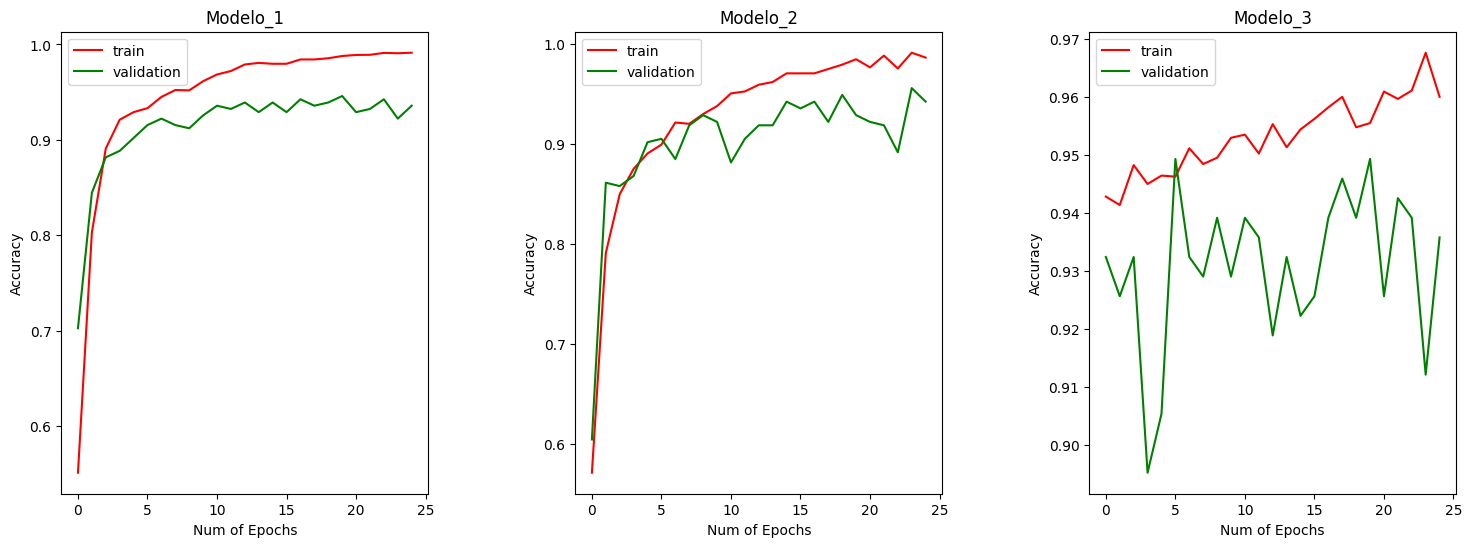

In [87]:
# Crear una figura con tres subplots
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

# Replace cnn with the corresponding DataFrames
histories = {"Modelo_1": entrenamiento_df, "Modelo_2": entrenamiento_df_2, "Modelo_3": entrenamiento_df_3}

# Set keys for accuracy and validation accuracy
keys = [('acc', 'val_acc') if 'acc' in df.columns else ('accuracy', 'val_accuracy') for df in histories.values()]

for idx, (name, history) in enumerate(histories.items()):
    axs[idx].plot(history[keys[idx][0]], 'r')
    axs[idx].plot(history[keys[idx][1]], 'g')
    axs[idx].set_xlabel("Num of Epochs")
    axs[idx].set_ylabel("Accuracy")
    axs[idx].set_title(name)
    axs[idx].legend(['train', 'validation'])

# Ajustar la separación entre subplots
plt.subplots_adjust(wspace=0.4)


Al revisar las tres curvas de los modelos realizados (incluido el punto del bono) se evidencia que el primer modelo desde nuestro punto de vista resulta el más consistente en los datosde validación en pocas número de épocas, comparada a los otros dos, considerando que las precisiones obtenidas son similares en los tres casos, en este caso nuestra hipótesis no resulto correcta con una técnica de transferencia de aprendizaje con una arquitectura VGG-16